# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [3]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
data.groupby("Gender").mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


In [8]:
data.groupby("Gender").std()

,Height,Weight
Gender,,
Female,2.696284,19.022468
Male,2.863362,19.781155


In [9]:

male_df =  data[data["Gender"] == 'Male']
female_df =  data[data["Gender"] == 'Female']

  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

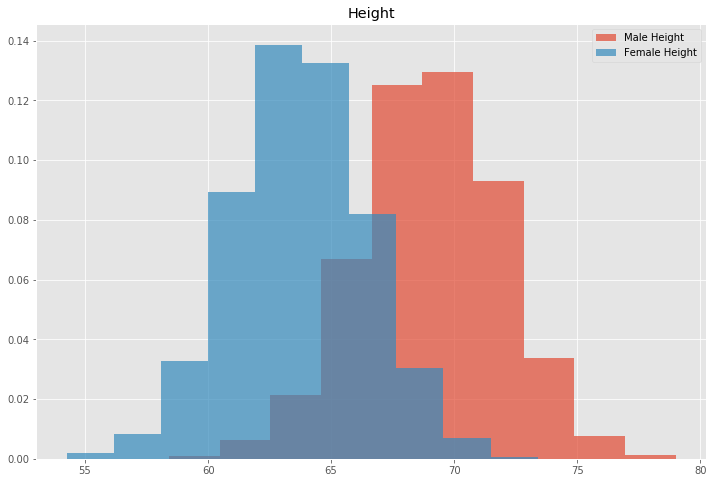

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
male_df.hist("Height", ax=ax, label="Male Height", density=True, alpha=.7)
female_df.hist("Height", ax=ax, label="Female Height", density=True, alpha=.7)
plt.legend()
plt.show()

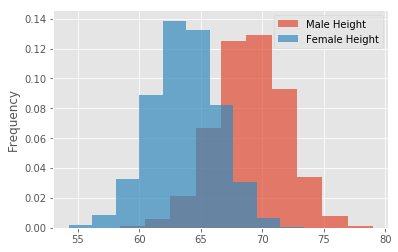

# Record your observations - are these inline with your personal observations?

Yup, looks about right.  Overlapping of male and female heights occurs at the bottom end of male height and top of female height

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

In [20]:
def density(x):
    
    n, bins = np.histogram(x, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        
        pdfx[k] = .5*(bins[k] + bins[k+1])
        pdfy[k] = n[k]

    return pdfx,pdfy





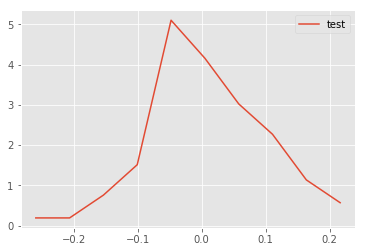

In [21]:

#Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

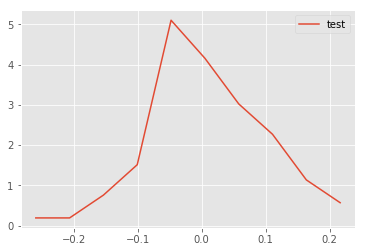

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

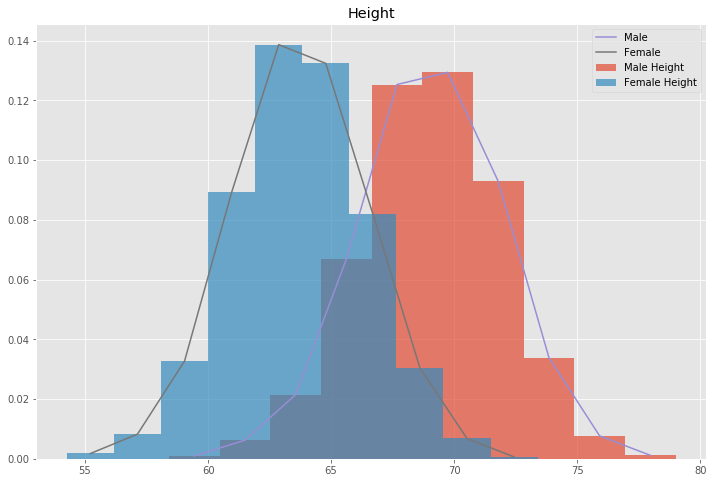

In [25]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(111)

male_df.hist("Height", ax=ax2, label="Male Height", density=True, alpha=.7)
female_df.hist("Height", ax=ax2, label="Female Height", density=True, alpha=.7)

xM, yM = density(male_df.Height)
xF, yF = density(female_df.Height)
plt.plot(xM, yM, label="Male")
plt.plot(xF, yF, label="Female")

plt.legend()
plt.show()

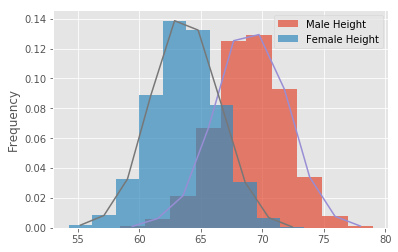

#### Repeat above exerice for male and female weights

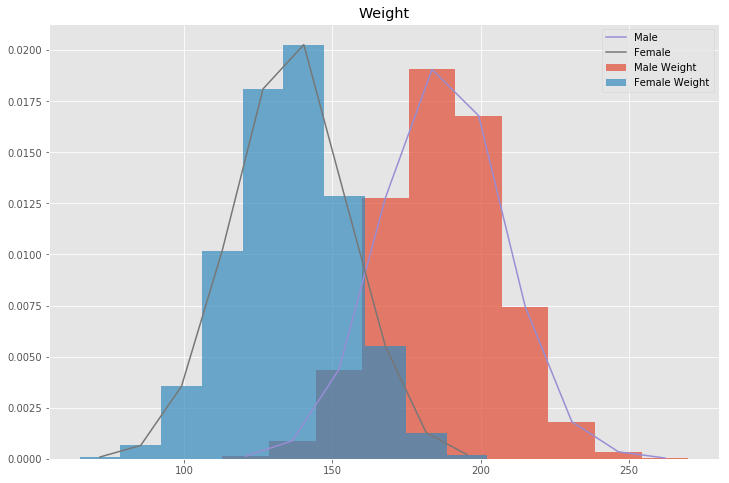

In [26]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(111)

male_df.hist("Weight", ax=ax2, label="Male Weight", density=True, alpha=.7)
female_df.hist("Weight", ax=ax2, label="Female Weight", density=True, alpha=.7)

xM, yM = density(male_df.Weight)
xF, yF = density(female_df.Weight)
plt.plot(xM, yM, label="Male")
plt.plot(xF, yF, label="Female")

plt.legend()
plt.show()

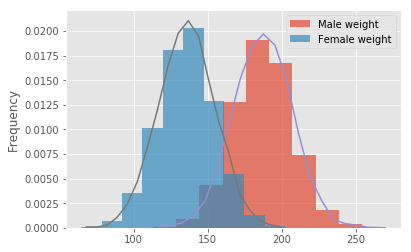

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?

looks good to me
# So whats the takeaway when comparing male and female heights and weights 
males tend to weigh more and stand taller than women.  But there is overlap between the two genders.  But there seems
to be more overlap with height than weight


#### Repeat Above experiments in seaborn and compare with your results. 

In [27]:
import seaborn as sns

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


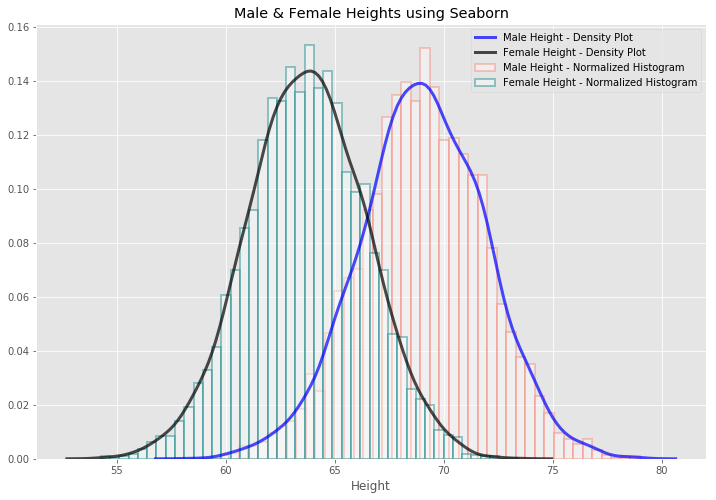

In [30]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

sns.distplot(male_df.Height,
             hist = True, hist_kws={"linewidth": 2,
                                  "edgecolor" :'salmon',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Male Height - Normalized Histogram"},
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Male Height - Density Plot'
                                 },
             ax=ax
            )

sns.distplot(female_df.Height,
             hist = True, hist_kws={"linewidth": 2,
                                  "edgecolor" :'teal',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Female Height - Normalized Histogram"},
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "black",
                                  "alpha": 0.7,
                                  'label':'Female Height - Density Plot'
                                 },
             ax=ax
            )

plt.legend()
plt.title("Male & Female Heights using Seaborn")
plt.show()






Text(0.5,1,'Comparing weights')

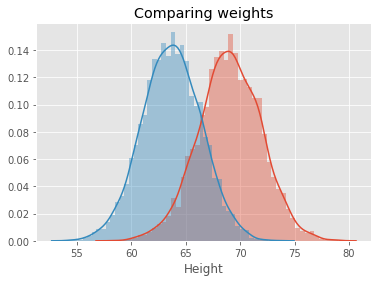

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


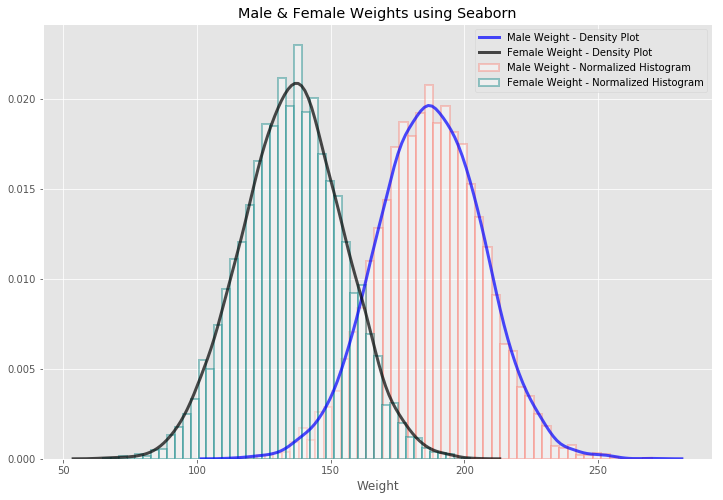

In [31]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

sns.distplot(male_df.Weight,
             hist = True, hist_kws={"linewidth": 2,
                                  "edgecolor" :'salmon',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Male Weight - Normalized Histogram"},
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Male Weight - Density Plot'
                                 },
             ax=ax
            )

sns.distplot(female_df.Weight,
             hist = True, hist_kws={"linewidth": 2,
                                  "edgecolor" :'teal',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Female Weight - Normalized Histogram"},
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "black",
                                  "alpha": 0.7,
                                  'label':'Female Weight - Density Plot'
                                 },
             ax=ax
            )

plt.legend()
plt.title("Male & Female Weights using Seaborn")
plt.show()

Text(0.5,1,'Comparing Weights')

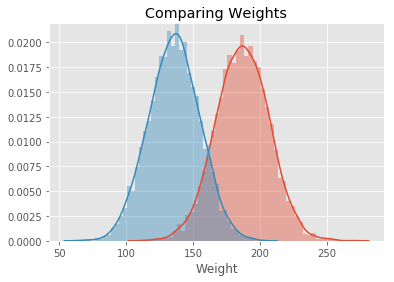

# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

Seaborn was easier due to it having the built-in capability for kernel density estimation.  It also looks, graphically, nicer.  But the code is a little clunkier looking

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.